In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#minha funcao para mostrar as imagens
def imshow(im,big=False):
    if big:
        plt.figure(figsize=(20,20))
    else:
        plt.figure()
    if len(im.shape)<3:
        plt.imshow(im, cmap='gray')#As cores ficam zoadas no Jupyter se deixar sem esse parâmetro
    else:
        plt.imshow(im[:,:,::-1]) 
    plt.axis('off')
    plt.show()

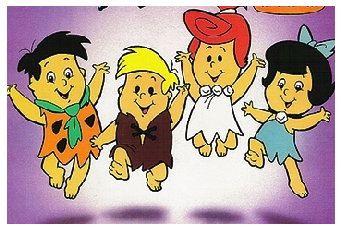

In [4]:
im = cv2.imread('imgs/1.jpg')
imshow(im)

***
# Segmentação

Referências: <br>
https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html <br>
https://scikit-image.org/docs/dev/api/skimage.segmentation.html

In [1]:
from skimage.segmentation import felzenszwalb,slic,quickshift,watershed
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2gray
from skimage.filters import sobel

In [2]:
def pinta_blobs(mask,angle=20):
    #cria imagens
    im_hsv = np.ones((mask.shape[0],mask.shape[1],3)).astype('uint8')*255
    
    #printa usando a mascara
    im_hsv[:,:,0] = (mask*angle)%180

    return cv2.cvtColor(im_hsv, cv2.COLOR_HSV2BGR)

def pinta_blobs2(labels,im):
    n_labels = labels.max()
    im_out = np.zeros(im.shape)
    for label in range(1,n_labels+1):
        mask = labels==label
        b,g,r    = im[:,:,0],im[:,:,1],im[:,:,2]
        bo,go,ro = im_out[:,:,0],im_out[:,:,1],im_out[:,:,2]
        bo[mask] += b[mask].mean()
        go[mask] += g[mask].mean()
        ro[mask] += r[mask].mean()
    return im_out.astype('uint8')

#### Test felzenszwalb

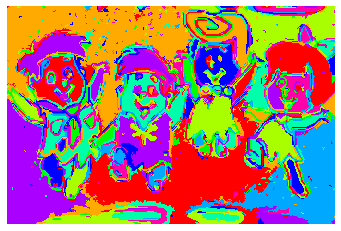

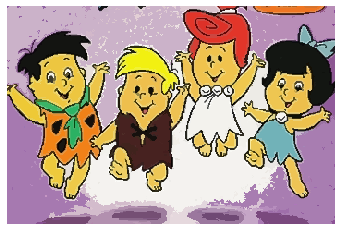

In [38]:
#segments_fz = felzenszwalb(im, scale=100, sigma=0.5, min_size=50)
segments_fz = felzenszwalb(im, scale=100, sigma=0.5, min_size=3)
imshow(pinta_blobs(segments_fz))
imshow(pinta_blobs2(segments_fz+1,im))

#### Teste slic

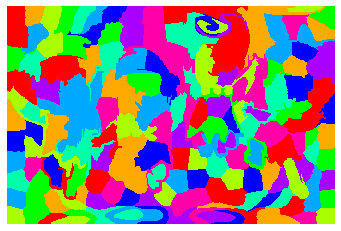

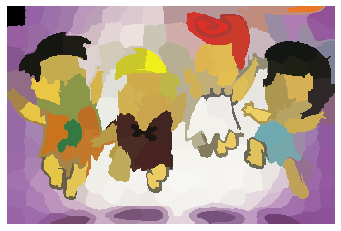

In [47]:
#segments_slic = slic(im, n_segments=250, compactness=10, sigma=1)
segments_slic = slic(im, n_segments=250, compactness=10, sigma=1)
imshow(pinta_blobs(segments_slic))
imshow(pinta_blobs2(segments_slic,im))

#### Teste quickshift

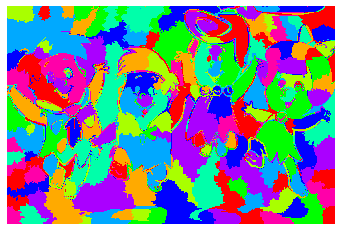

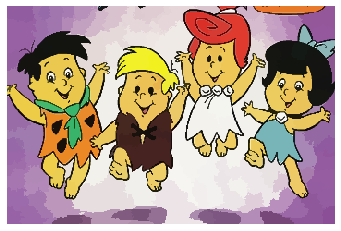

In [18]:
#segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
segments_quick = quickshift(im, kernel_size=3, max_dist=6, ratio=0.5)
imshow(pinta_blobs(segments_quick))
imshow(pinta_blobs2(segments_quick,im))

#### Teste watershed

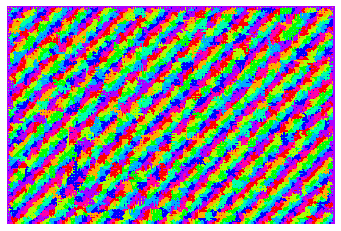

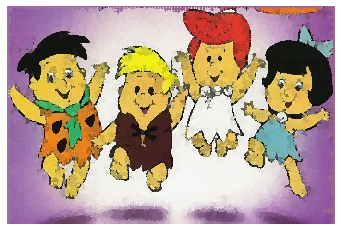

In [26]:
gradient = sobel(rgb2gray(im))
#segments_watershed = watershed(gradient, markers=250, compactness=0.001)
segments_watershed = watershed(gradient, markers=10000, compactness=0)
imshow(pinta_blobs(segments_watershed))
imshow(pinta_blobs2(segments_watershed,im))

***
# Contornos

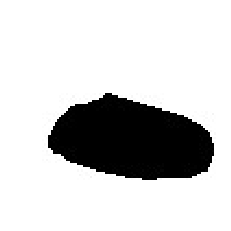

In [10]:
im = cv2.imread('imgs/im.jpg')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imshow(im_gray)

cv2.findContours
### mode:
RETR_EXTERNAL 	
retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours.

RETR_LIST 	
retrieves all of the contours without establishing any hierarchical relationships.

RETR_CCOMP 	
retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

RETR_TREE 	
retrieves all of the contours and reconstructs a full hierarchy of nested contours.

RETR_FLOODFILL 	

### method:
CHAIN_APPROX_NONE 	
stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.

CHAIN_APPROX_SIMPLE 	
compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

CHAIN_APPROX_TC89_L1 	
applies one of the flavors of the Teh-Chin chain approximation algorithm [168]

CHAIN_APPROX_TC89_KCOS 	
applies one of the flavors of the Teh-Chin chain approximation algorithm [168]

In [11]:
ret,thresh = cv2.threshold(im_gray,127,255,0)
con,h = cv2.findContours(thresh,mode=cv2.RETR_TREE,method = cv2.CHAIN_APPROX_SIMPLE)
len(con)

2

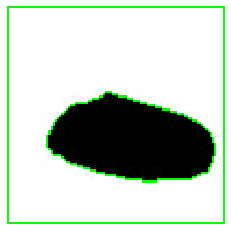

In [12]:
im_cont = cv2.drawContours(im.copy(), con, -1, (0,255,0), 1)
imshow(im_cont)

# Aproximando por poligonos
https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html

In [13]:
def pinta_poligonos(im,poligonos,lineThickness=1):
    im = im.copy()
    #cria uma linha entre todos os vertices
    for i in range(len(poligonos)-1):
        cv2.line(im, tuple(poligonos[i,0]), tuple(poligonos[i+1,0]), (0,255,0), lineThickness)
    #linha entre o primeiro e ultimo vertice
    cv2.line(im, tuple(poligonos[0,0]), tuple(poligonos[-1,0]), (0,255,0), lineThickness)
    return im

In [14]:
#transforma o contorno 1 em poligonos
poligonos = cv2.approxPolyDP(con[1],epsilon=0.1,closed = True)
len(poligonos)

92

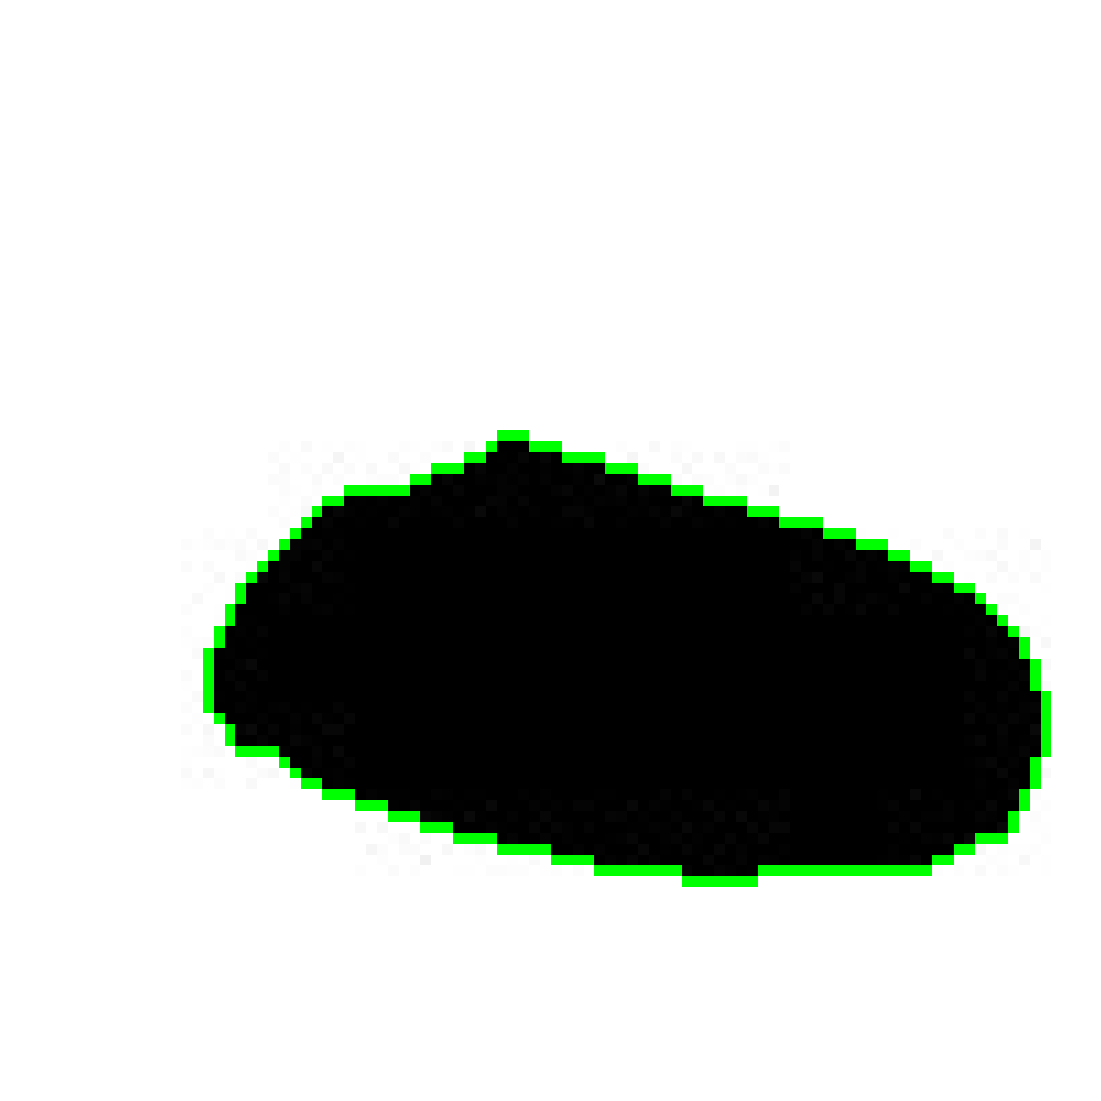

In [17]:
imshow(pinta_poligonos(im,poligonos),True)

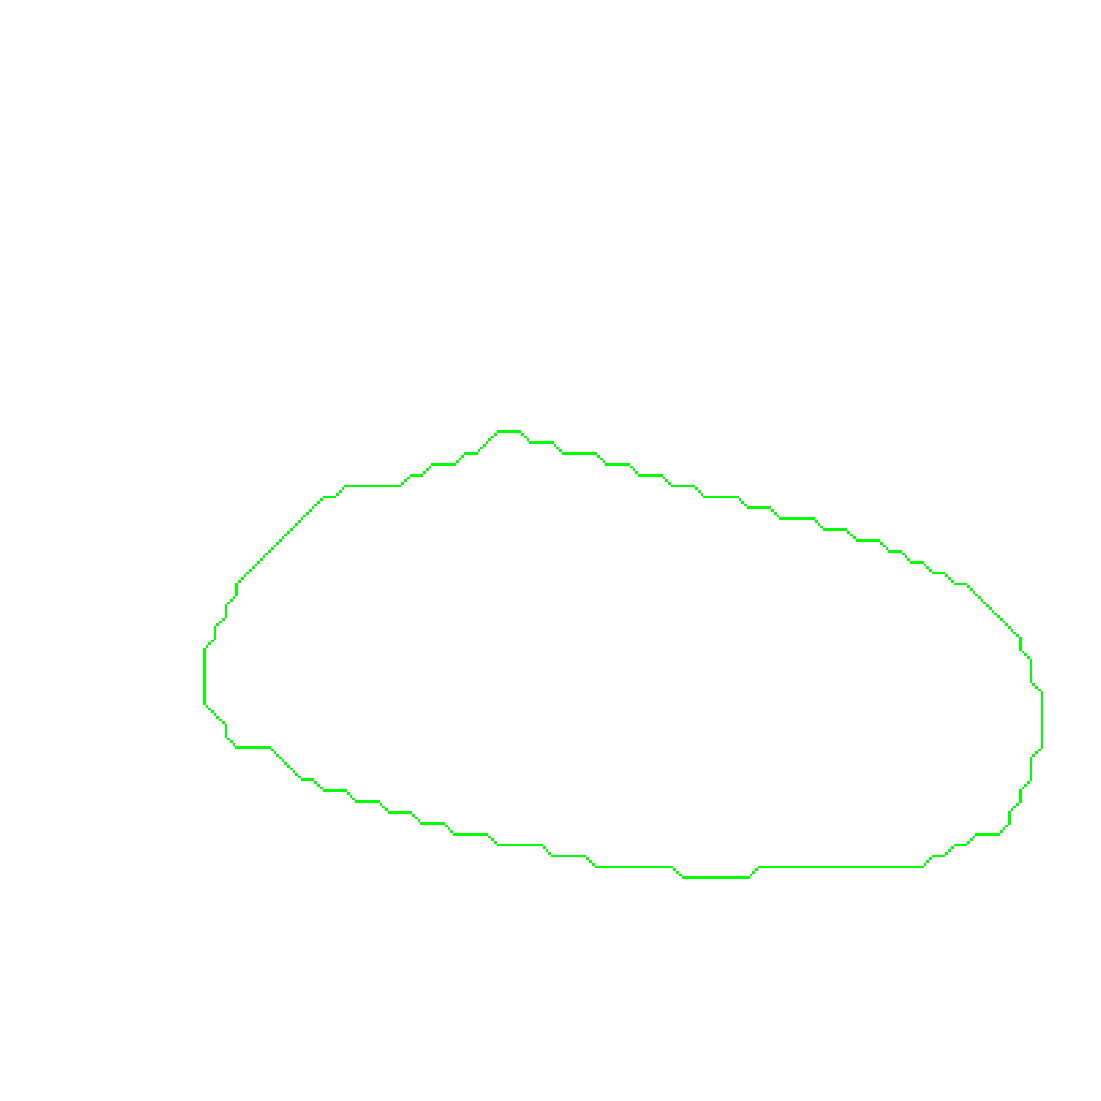

In [18]:
#em uma imagem 4 vezes maior
im_4x = np.ones((400,400,3)).astype('uint8')*255
im_pintada = pinta_poligonos(im_4x,poligonos*4,1)
imshow(im_pintada,True)